# Sammlung von EDA-Methoden
https://towardsdatascience.com/churn-prediction-770d6cb582a5

hier meine Aufzeichnungen zu Visualisierungen: https://github.com/JHC90/Basic-DataScience-Skills/blob/master/0_Visualisierung_matplotlib.ipynb

hier geht es darum vorherzusagen ob ein Kunde das Unternehmen verlässt oder nicht. Es ist ein Supvised Problem. Der datensatz kommt von hier: "https://www.kaggle.com/blastchar/telco-customer-churn"

In [47]:
# Bibliotheken
import pandas as pd

In [48]:
df = pd.read_csv('./data/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [49]:
# descriptive Understanding(https://machinelearningmastery.com/python-machine-learning-mini-course/)
#print(df.head)
#print(df.shape)
#print(df.dtypes)
#print(df.describe()) => nur die Numerischen
#print(df.corr())

In [50]:
print(df.shape)
df = df.dropna(how="all") # remove samples with all missing values
df = df[~df.duplicated()] # remove duplicates

(7043, 21)


In [51]:
total_charges_filter = df.TotalCharges == " " # würde mir das subsetz geben wo " " in dem Feature "TotalCharges" ist
df = df[~total_charges_filter] # = altes df ohne die vorher detektierten Leerwerte

In [52]:
df = df[~total_charges_filter]
df.TotalCharges = pd.to_numeric(df.TotalCharges)
print(df.shape)
print(total_charges_filter.shape)

(7032, 21)
(7043,)


C:\Users\1810837475\.conda\envs\Kompensationsarbeit\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


# Exploratory Data Analysis

In [53]:
print(df.columns)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [54]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7032 non-null object
gender              7032 non-null object
SeniorCitizen       7032 non-null int64
Partner             7032 non-null object
Dependents          7032 non-null object
tenure              7032 non-null int64
PhoneService        7032 non-null object
MultipleLines       7032 non-null object
InternetService     7032 non-null object
OnlineSecurity      7032 non-null object
OnlineBackup        7032 non-null object
DeviceProtection    7032 non-null object
TechSupport         7032 non-null object
StreamingTV         7032 non-null object
StreamingMovies     7032 non-null object
Contract            7032 non-null object
PaperlessBilling    7032 non-null object
PaymentMethod       7032 non-null object
MonthlyCharges      7032 non-null float64
TotalCharges        7032 non-null float64
Churn               7032 non-null object
dtypes: float64(2), int64(2), ob

In [55]:
print(df.describe())

       SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7032.000000  7032.000000     7032.000000   7032.000000
mean        0.162400    32.421786       64.798208   2283.300441
std         0.368844    24.545260       30.085974   2266.771362
min         0.000000     1.000000       18.250000     18.800000
25%         0.000000     9.000000       35.587500    401.450000
50%         0.000000    29.000000       70.350000   1397.475000
75%         0.000000    55.000000       89.862500   3794.737500
max         1.000000    72.000000      118.750000   8684.800000


In [56]:
print(df.shape)

(7032, 21)


# Split in Datentypen
hab ich hier laut tutorial übernommen, kann man besser lösen indem ich das hier mache " https://github.com/JHC90/Basic-DataScience-Skills/blob/master/1_SplitDataByDataType.ipynb "


In [57]:
categorical_features = [
 "gender",
 "SeniorCitizen",
 "Partner",
 "Dependents",
 "PhoneService",
 "MultipleLines",
 "InternetService",
 "OnlineSecurity",
 "OnlineBackup",
 "DeviceProtection",
 "TechSupport",
 "StreamingTV",
 "StreamingMovies",
 "Contract",
 "PaperlessBilling",
 "PaymentMethod",
]
numerical_features = ["tenure", "MonthlyCharges", "TotalCharges"]
target = "Churn"

In [58]:
df[numerical_features].describe()

tenure  MonthlyCharges  TotalCharges
count  7032.000000     7032.000000   7032.000000
mean     32.421786       64.798208   2283.300441
std      24.545260       30.085974   2266.771362
min       1.000000       18.250000     18.800000
25%       9.000000       35.587500    401.450000
50%      29.000000       70.350000   1397.475000
75%      55.000000       89.862500   3794.737500
max      72.000000      118.750000   8684.800000

## Numerical EDA
Betrachtung der Verteilung

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EACB19F908>,
      dtype=object)

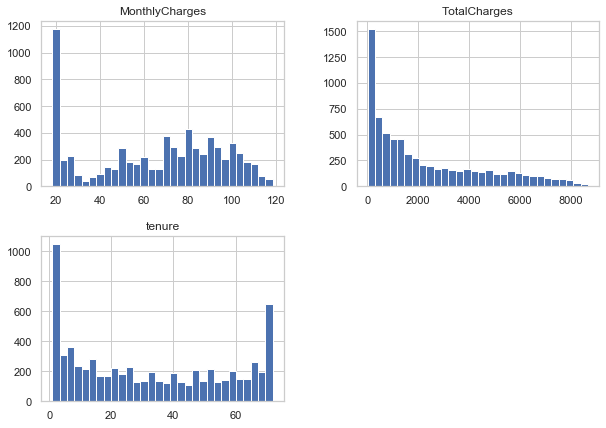

In [59]:
df[numerical_features].hist(bins=30, figsize=(10, 7))

im nachfolgenden wird die Zielvariabel noch hinzugefügt, somit kann man erkennen wieiviel chruned sind die bspw 120$ im monat monthly charge haben

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001EACB5F4A58>,
      dtype=object)

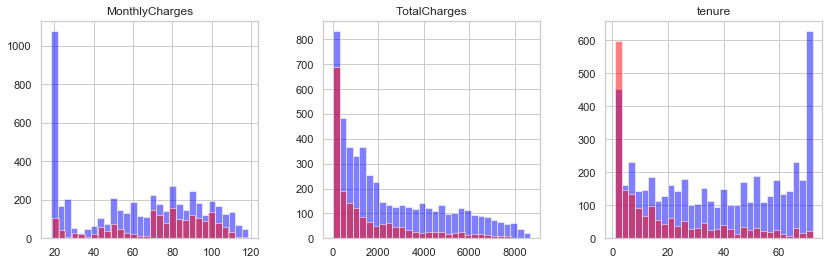

In [60]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 3, figsize=(14, 4))
df[df.Churn == "No"][numerical_features].hist(bins=30, color="blue", alpha=0.5, ax=ax)
df[df.Churn == "Yes"][numerical_features].hist(bins=30, color="red", alpha=0.5, ax=ax)

# Boxplot
Dient dazu die Verteilung einschätzen zu können
abhängig davon wie stark die Daten dann veteilt sind, entscheidet man sich für eine Skalierungsmethode => logischerweis nur für die numerischen interessant.

https://seaborn.pydata.org/generated/seaborn.boxplot.html

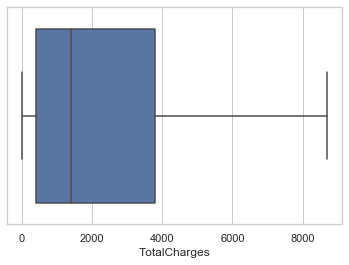

In [61]:
import seaborn as sns
sns.set(style="whitegrid")
tips = sns.load_dataset("tips") # => datensatz für die kommenden Boxplots
ax = sns.boxplot(x=df.TotalCharges, data=tips)

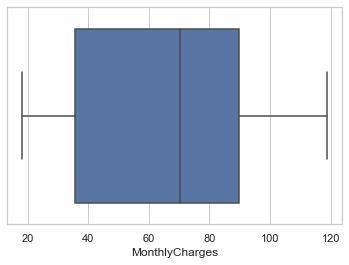

In [62]:
ax = sns.boxplot(x=df.MonthlyCharges, data=tips)

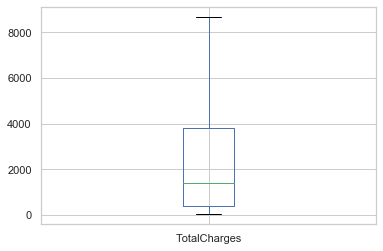

In [74]:
# Boxplot mit Pandas
import pandas as pd
import random as rand
#boxplot = df.boxplot()
boxplot = df.boxplot(column=['TotalCharges'])

### Viololin Plot
hier der Link: https://plot.ly/python/violin/
#!pip install plotly


In [75]:
import plotly.express as px

#df = px.data.tips()
fig = px.violin(df, y="MonthlyCharges")
fig.show()

In [70]:
fig = px.violin(df, y="MonthlyCharges", box=True, # draw box plot inside the violin
                points='all', # can be 'outliers', or False
               )
fig.show()

In [71]:
fig = px.violin(df, y="MonthlyCharges", x="Partner", color="gender", box=True, points="all",
          hover_data=df.columns)
fig.show()

In [51]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null object
smoker        244 non-null object
day           244 non-null object
time          244 non-null object
size          244 non-null int64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB
None


# Scatterplot

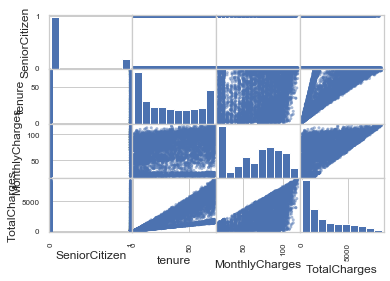

In [78]:
from pandas.plotting import scatter_matrix
scatter_matrix(df)
plt.show()


## Categorical EDA
#Anaylse der Kategorischen Variablen. Das vorgehen hier ist gut, da wir in jedem Feature nicht zuviele auspägungen haben

C:\Users\1810837475\.conda\envs\Kompensationsarbeit\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  


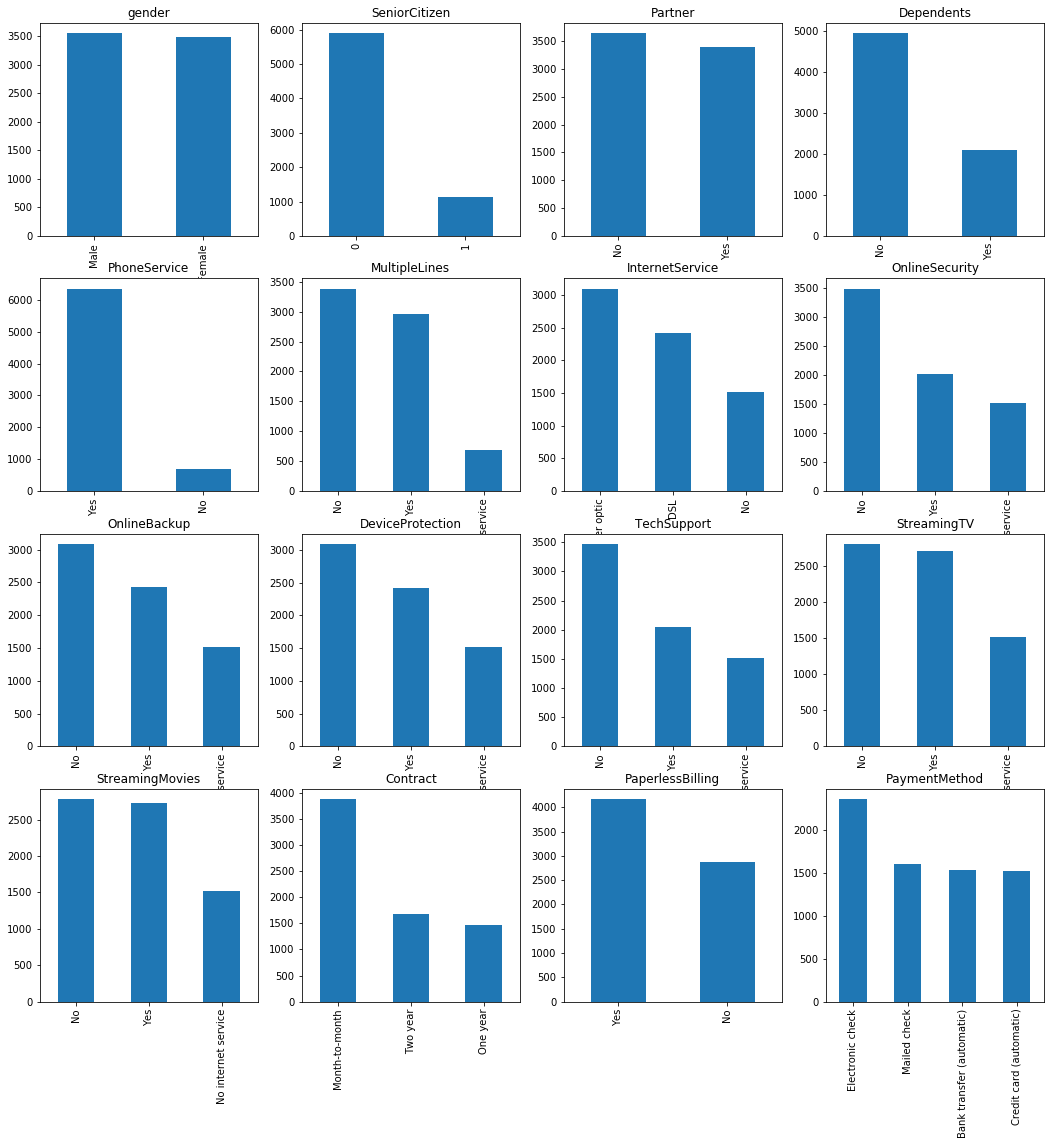

In [34]:
ROWS, COLS = 4, 4
fig, ax = plt.subplots(ROWS, COLS, figsize=(18, 18))
row, col = 0, 0
for i, categorical_feature in enumerate(categorical_features):
    if col == COLS - 1:
        row += 1
    col = i % COLS
    df[categorical_feature].value_counts().plot('bar', ax=ax[row, col]).set_title(categorical_feature)

C:\Users\1810837475\.conda\envs\Kompensationsarbeit\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\1810837475\.conda\envs\Kompensationsarbeit\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  after removing the cwd from sys.path.


Text(0.5, 1.0, 'churned')

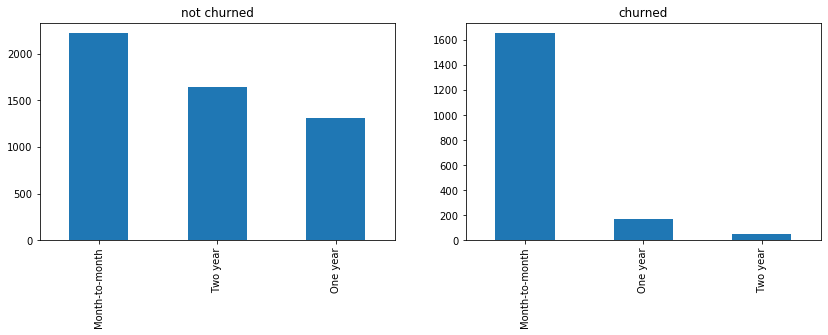

In [42]:
feature = 'Contract'
fig, ax = plt.subplots(1, 2, figsize=(14, 4))
df[df.Churn == "No"][feature].value_counts().plot('bar', ax=ax[0]).set_title('not churned')
df[df.Churn == "Yes"][feature].value_counts().plot('bar', ax=ax[1]).set_title('churned')

C:\Users\1810837475\.conda\envs\Kompensationsarbeit\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'churned')

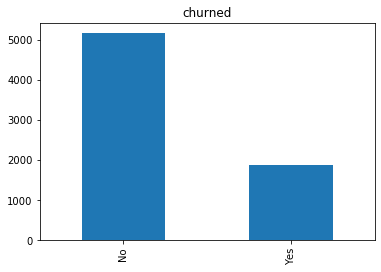

In [43]:
df[target].value_counts().plot('bar').set_title('churned')

# Darstellung via jitter
hier kann man eine numerische Ausprägung in Abhängigkeit zu dem kategorischen Ausprägung setzen

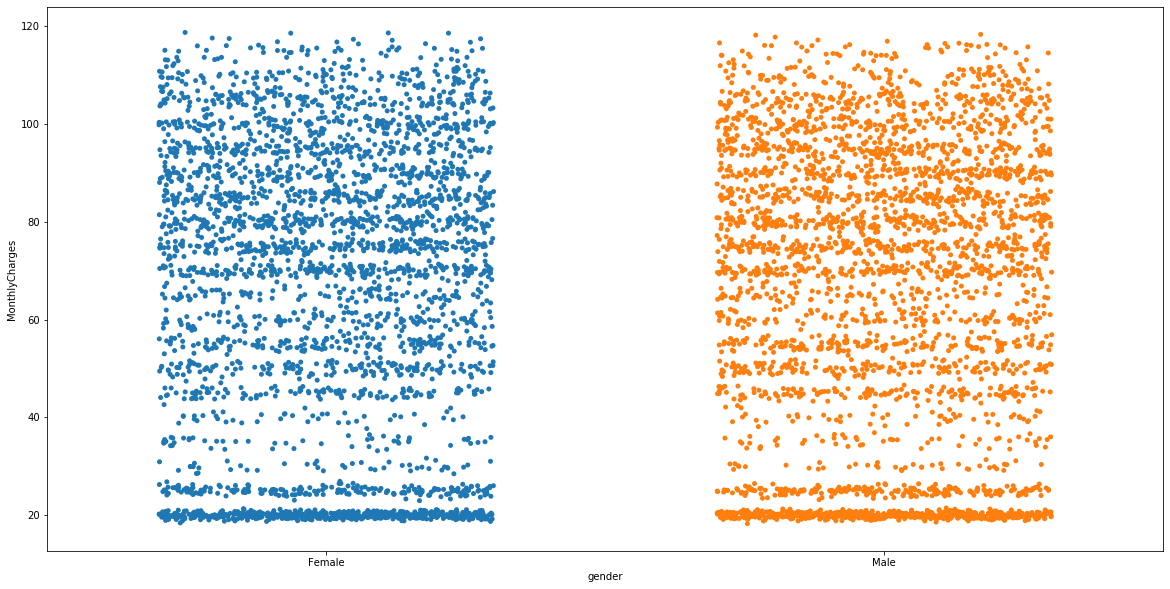

In [27]:

import seaborn as sns
from matplotlib import pyplot as plt
plt.figure(figsize=(20,10))
sns.stripplot(data=df, x='gender', y='MonthlyCharges', jitter=0.3)

# Korrelationen
zeigt wie die Variablen zusammenhängen => geht nur auf die numerischen Variablen

In [21]:

df.corr()

SeniorCitizen    tenure  MonthlyCharges  TotalCharges
SeniorCitizen        1.000000  0.015683        0.219874      0.102411
tenure               0.015683  1.000000        0.246862      0.825880
MonthlyCharges       0.219874  0.246862        1.000000      0.651065
TotalCharges         0.102411  0.825880        0.651065      1.000000

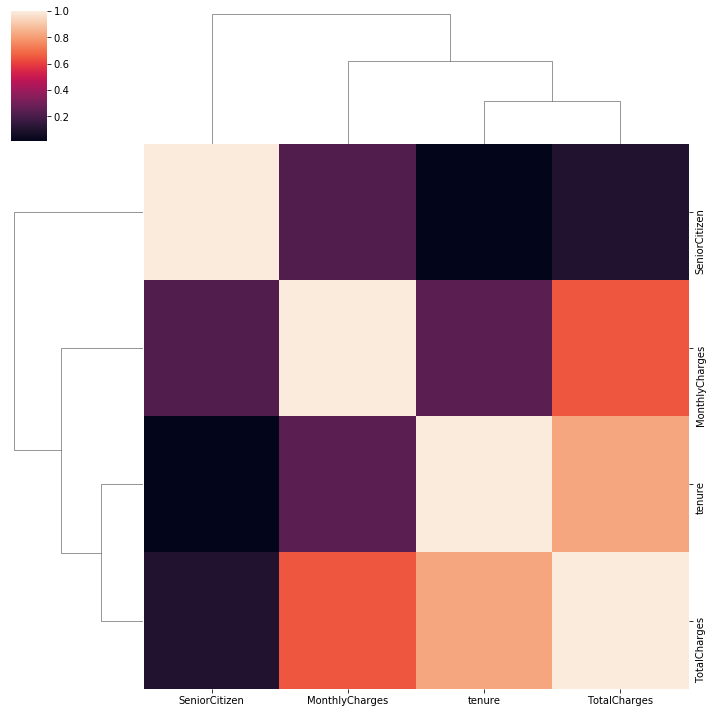

In [22]:
import seaborn as sns
sns.clustermap(df.corr())